In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-dec-2021/train.csv
/kaggle/input/tabular-playground-series-dec-2021/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

warnings.filterwarnings("ignore")

# Tabular Playground Series - Dec 2021

The tabular series on kaggle are meant to help novices in data science field to get acquainted with kaggle competitions.

The data is synthetically generated by a GAN that was trained on a the data from the Forest Cover Type Prediction. This dataset is (a) much larger, and (b) may or may not have the same relationship to the target as the original data.

# Train dataset

Lets first explore the train dataset and subsequently the test dataset.


In [3]:
train_df = pd.read_csv("/kaggle/input/tabular-playground-series-dec-2021/train.csv", sep=",")

In [4]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [5]:
train_df.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3999995,3999995,2954,34,25,51,65,6314,240,237,103,...,0,0,0,0,0,0,0,0,0,2
3999996,3999996,2926,104,8,696,83,5427,210,216,150,...,0,0,0,0,0,0,0,0,0,2
3999997,3999997,2911,144,1,509,58,4820,195,192,91,...,0,0,0,0,0,0,0,1,0,2
3999998,3999998,2580,178,17,376,86,2592,225,183,39,...,0,0,0,0,0,0,0,0,0,3
3999999,3999999,3083,136,4,44,9,1675,213,197,205,...,0,0,0,0,0,0,0,0,0,1


In [6]:
print('Dataset shape: ', train_df.shape )

Dataset shape:  (4000000, 56)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          

In [8]:
train_df.dtypes.value_counts()

int64    56
dtype: int64

In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,4000000.0,2.000000e+06,1.154701e+06,0.0,999999.75,1999999.5,2999999.25,3999999.0
Elevation,4000000.0,2.980192e+03,2.890482e+02,1773.0,2760.00,2966.0,3217.00,4383.0
Aspect,4000000.0,1.515857e+02,1.099611e+02,-33.0,60.00,123.0,247.00,407.0
Slope,4000000.0,1.509754e+01,8.546731e+00,-3.0,9.00,14.0,20.00,64.0
Horizontal_Distance_To_Hydrology,4000000.0,2.713154e+02,2.265497e+02,-92.0,110.00,213.0,361.00,1602.0
Vertical_Distance_To_Hydrology,4000000.0,5.166262e+01,6.821597e+01,-317.0,4.00,31.0,78.00,647.0
Horizontal_Distance_To_Roadways,4000000.0,1.766642e+03,1.315610e+03,-287.0,822.00,1436.0,2365.00,7666.0
Hillshade_9am,4000000.0,2.118375e+02,3.075996e+01,-4.0,198.00,218.0,233.00,301.0
Hillshade_Noon,4000000.0,2.210614e+02,2.223134e+01,49.0,210.00,224.0,237.00,279.0
Hillshade_3pm,4000000.0,1.408109e+02,4.369864e+01,-53.0,115.00,142.0,169.00,272.0


In [10]:
print("There are", train_df.isna().any().sum(), "missing values")

There are 0 missing values


Text(0, 0.5, 'Count')

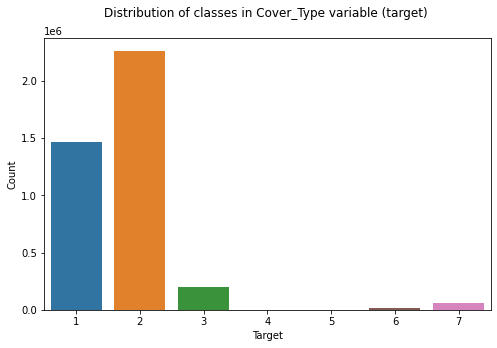

In [11]:
# Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(train_df['Cover_Type'])
plt.title("Distribution of classes in Cover_Type variable (target) \n")
plt.xlabel("Target")
plt.ylabel("Count")

<AxesSubplot:>

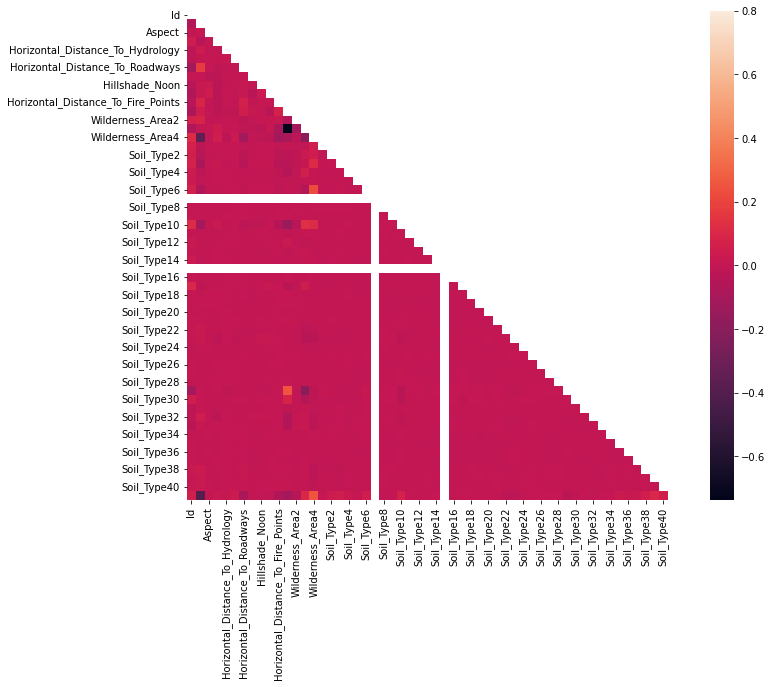

In [12]:
corr_matrix = train_df.corr()
mask = np.triu(np.ones_like(corr_matrix))
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=.8, square=True, mask=mask)

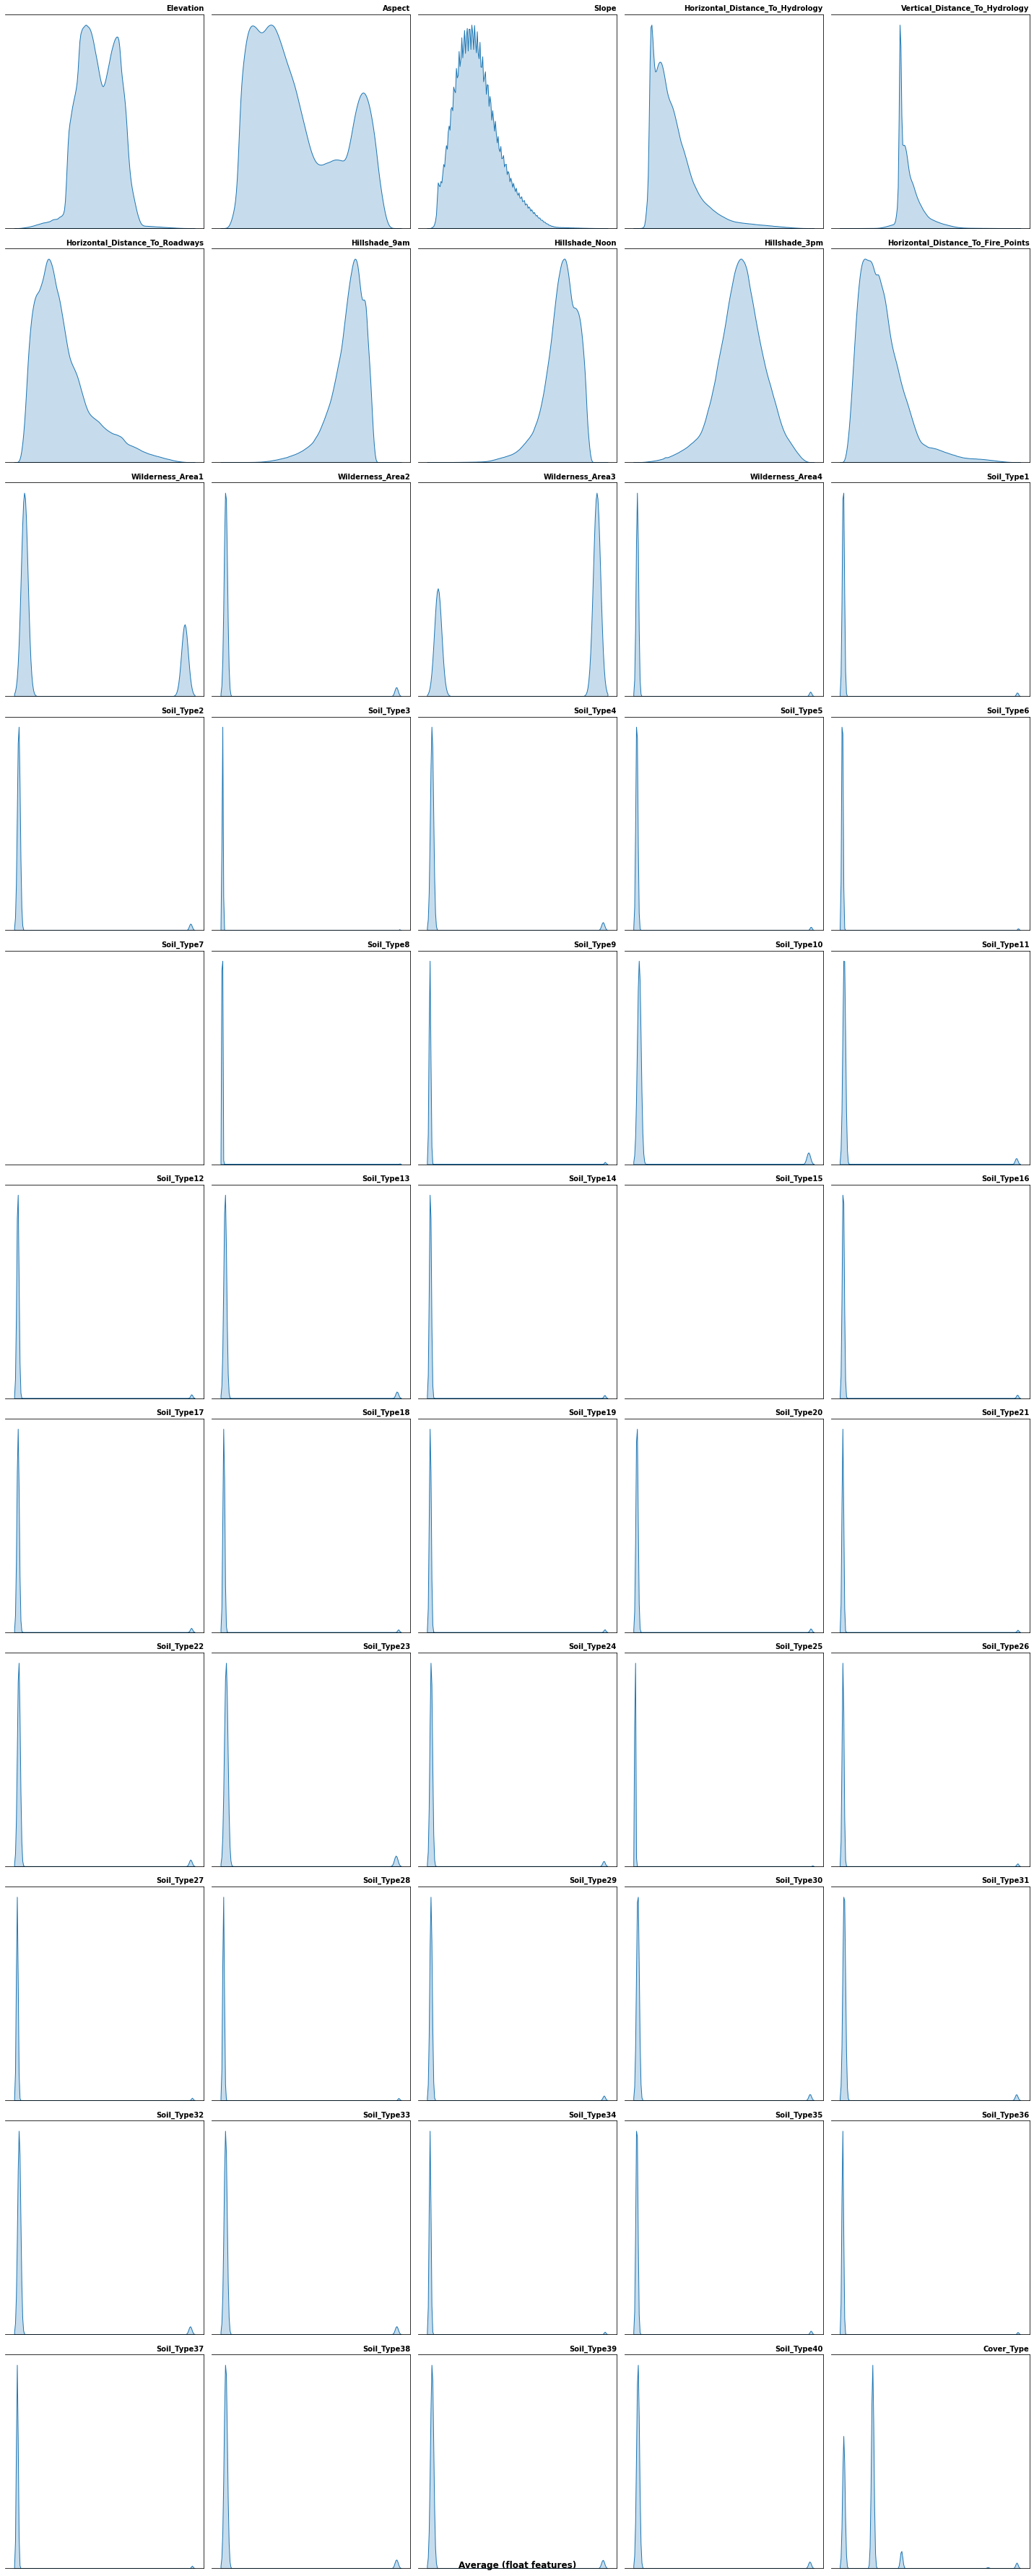

In [13]:
fig, axes = plt.subplots(11,5,figsize=(20, 50))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = train_df.columns[1:]

for i, ax in enumerate(axes):
    sns.kdeplot(data=train_df[columns], x=columns[i],ax=ax,palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

fig.supxlabel('Average (float features)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

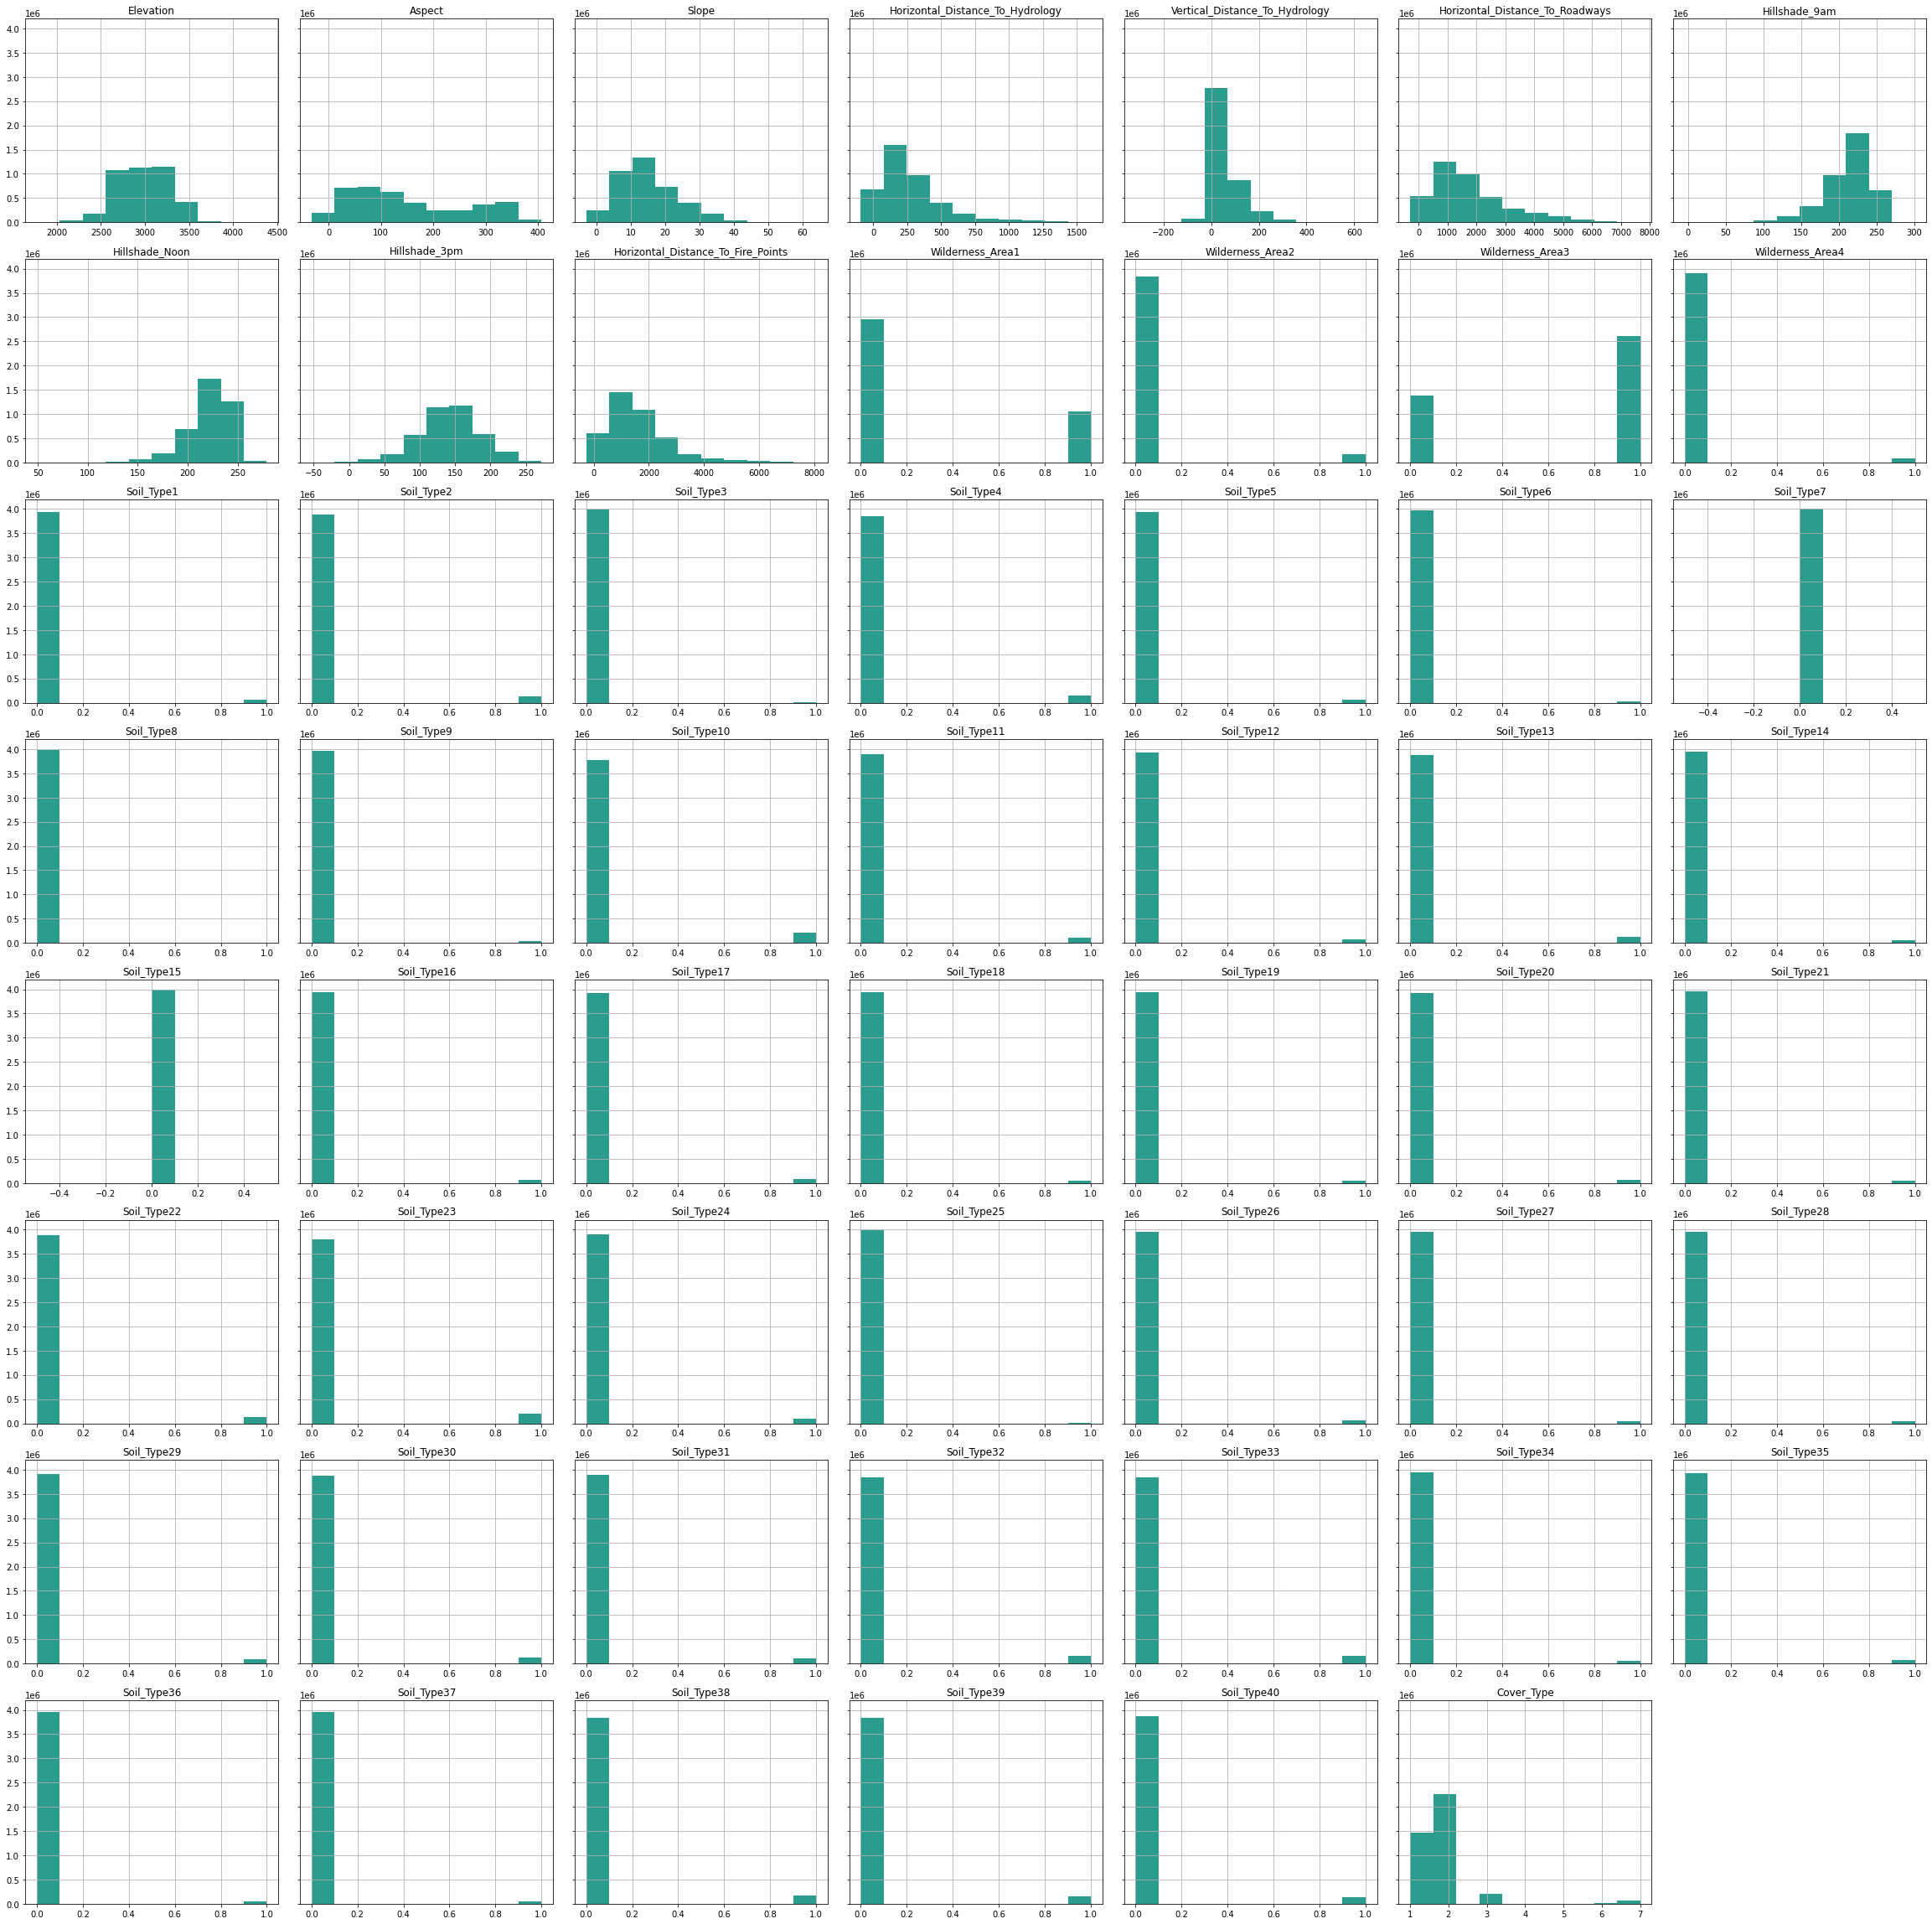

In [14]:
train_df[train_df.columns[1:]].hist(figsize=(32, 32), sharey=True);
plt.tight_layout()

# Summary 1

The train dataset has 55 features with a total of 4000000 samples. All features are of type int64, except for the target variable and id. There are no missing values. The target variable is  unbalanced and there are some correlated variables. Most of the features distribution looks bimodal or right-skewed.


# Test dataset

Here we will do the same analysis to test dataset

In [15]:
del train_df
gc.collect()

200282

In [16]:
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/test.csv', sep=',')

In [17]:
test_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,4000000,2763,78,20,377,88,3104,218,213,195,...,0,0,0,0,0,0,0,0,0,0
1,4000001,2826,153,11,264,39,295,219,238,148,...,0,0,0,0,0,0,0,0,0,0
2,4000002,2948,57,19,56,44,852,202,217,163,...,0,0,1,0,0,0,0,0,0,0
3,4000003,2926,119,6,158,134,2136,234,240,142,...,0,0,0,0,0,0,0,0,0,0
4,4000004,2690,10,4,38,108,3589,213,221,229,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test_df.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
999995,4999995,2974,254,15,146,100,623,222,245,117,...,0,0,0,0,0,0,0,0,0,0
999996,4999996,3180,92,16,93,47,3740,209,201,142,...,0,0,0,0,0,0,0,0,1,0
999997,4999997,2684,51,20,34,123,962,199,225,145,...,0,0,0,0,1,0,0,0,0,0
999998,4999998,3309,64,12,196,93,2522,226,193,74,...,0,0,0,0,0,0,0,0,0,0
999999,4999999,2543,322,7,162,147,2643,223,222,82,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print('Dataset shape: ', test_df.shape )

Dataset shape:  (1000000, 55)


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 55 columns):
 #   Column                              Non-Null Count    Dtype
---  ------                              --------------    -----
 0   Id                                  1000000 non-null  int64
 1   Elevation                           1000000 non-null  int64
 2   Aspect                              1000000 non-null  int64
 3   Slope                               1000000 non-null  int64
 4   Horizontal_Distance_To_Hydrology    1000000 non-null  int64
 5   Vertical_Distance_To_Hydrology      1000000 non-null  int64
 6   Horizontal_Distance_To_Roadways     1000000 non-null  int64
 7   Hillshade_9am                       1000000 non-null  int64
 8   Hillshade_Noon                      1000000 non-null  int64
 9   Hillshade_3pm                       1000000 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  1000000 non-null  int64
 11  Wilderness_Area1                    10

In [21]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1000000.0,4.500000e+06,288675.278933,4000000.0,4249999.75,4499999.5,4749999.25,4999999.0
Elevation,1000000.0,2.969602e+03,342.676046,1782.0,2725.00,2968.0,3245.00,4359.0
Aspect,1000000.0,1.522316e+02,111.629725,-33.0,59.00,124.0,251.00,400.0
Slope,1000000.0,1.492346e+01,8.457005,-3.0,9.00,14.0,20.00,63.0
Horizontal_Distance_To_Hydrology,1000000.0,2.643681e+02,227.971753,-136.0,102.00,206.0,356.00,1583.0
Vertical_Distance_To_Hydrology,1000000.0,5.148036e+01,68.520188,-329.0,3.00,31.0,78.00,634.0
Horizontal_Distance_To_Roadways,1000000.0,1.713508e+03,1374.922218,-264.0,751.00,1320.0,2261.00,7653.0
Hillshade_9am,1000000.0,2.116597e+02,31.280435,1.0,197.00,218.0,234.00,296.0
Hillshade_Noon,1000000.0,2.214762e+02,21.951950,53.0,210.00,224.0,237.00,276.0
Hillshade_3pm,1000000.0,1.398615e+02,45.398002,-51.0,114.00,142.0,169.00,270.0


In [22]:
print("There are", test_df.isna().any().sum(), "missing values")

There are 0 missing values


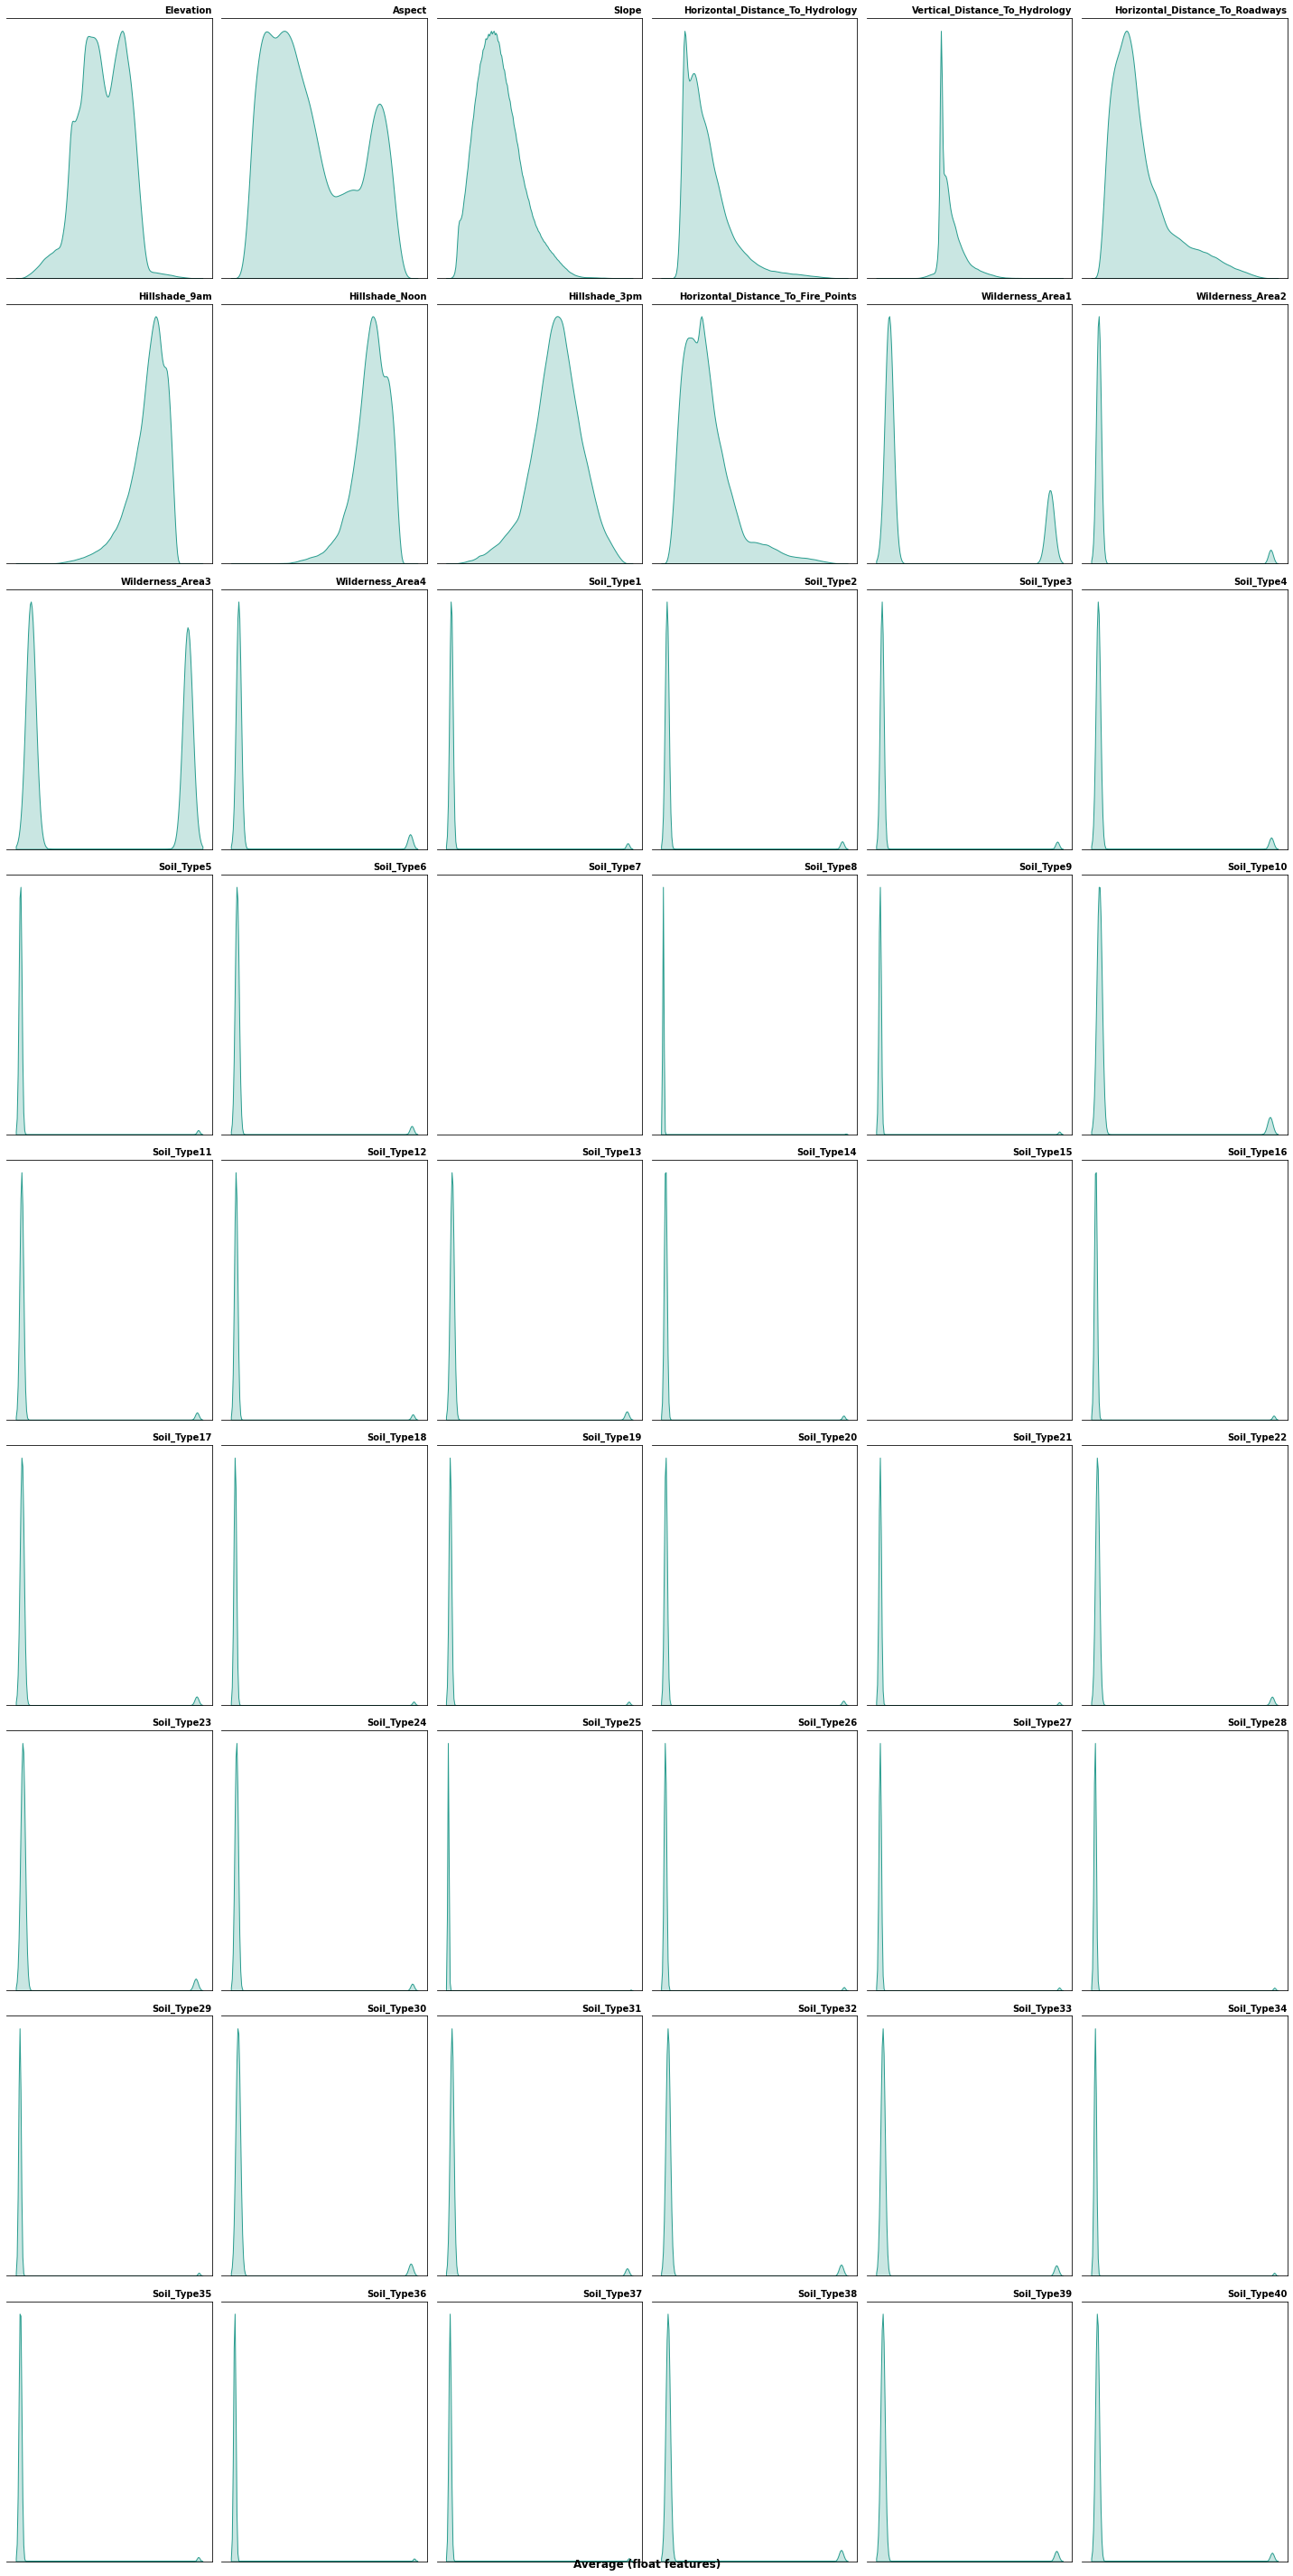

In [23]:
fig, axes = plt.subplots(9,6,figsize=(20, 40))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = test_df.columns[1:]

for i, ax in enumerate(axes):
    sns.kdeplot(data=test_df[columns], x=columns[i],ax=ax,palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

fig.supxlabel('Average (float features)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

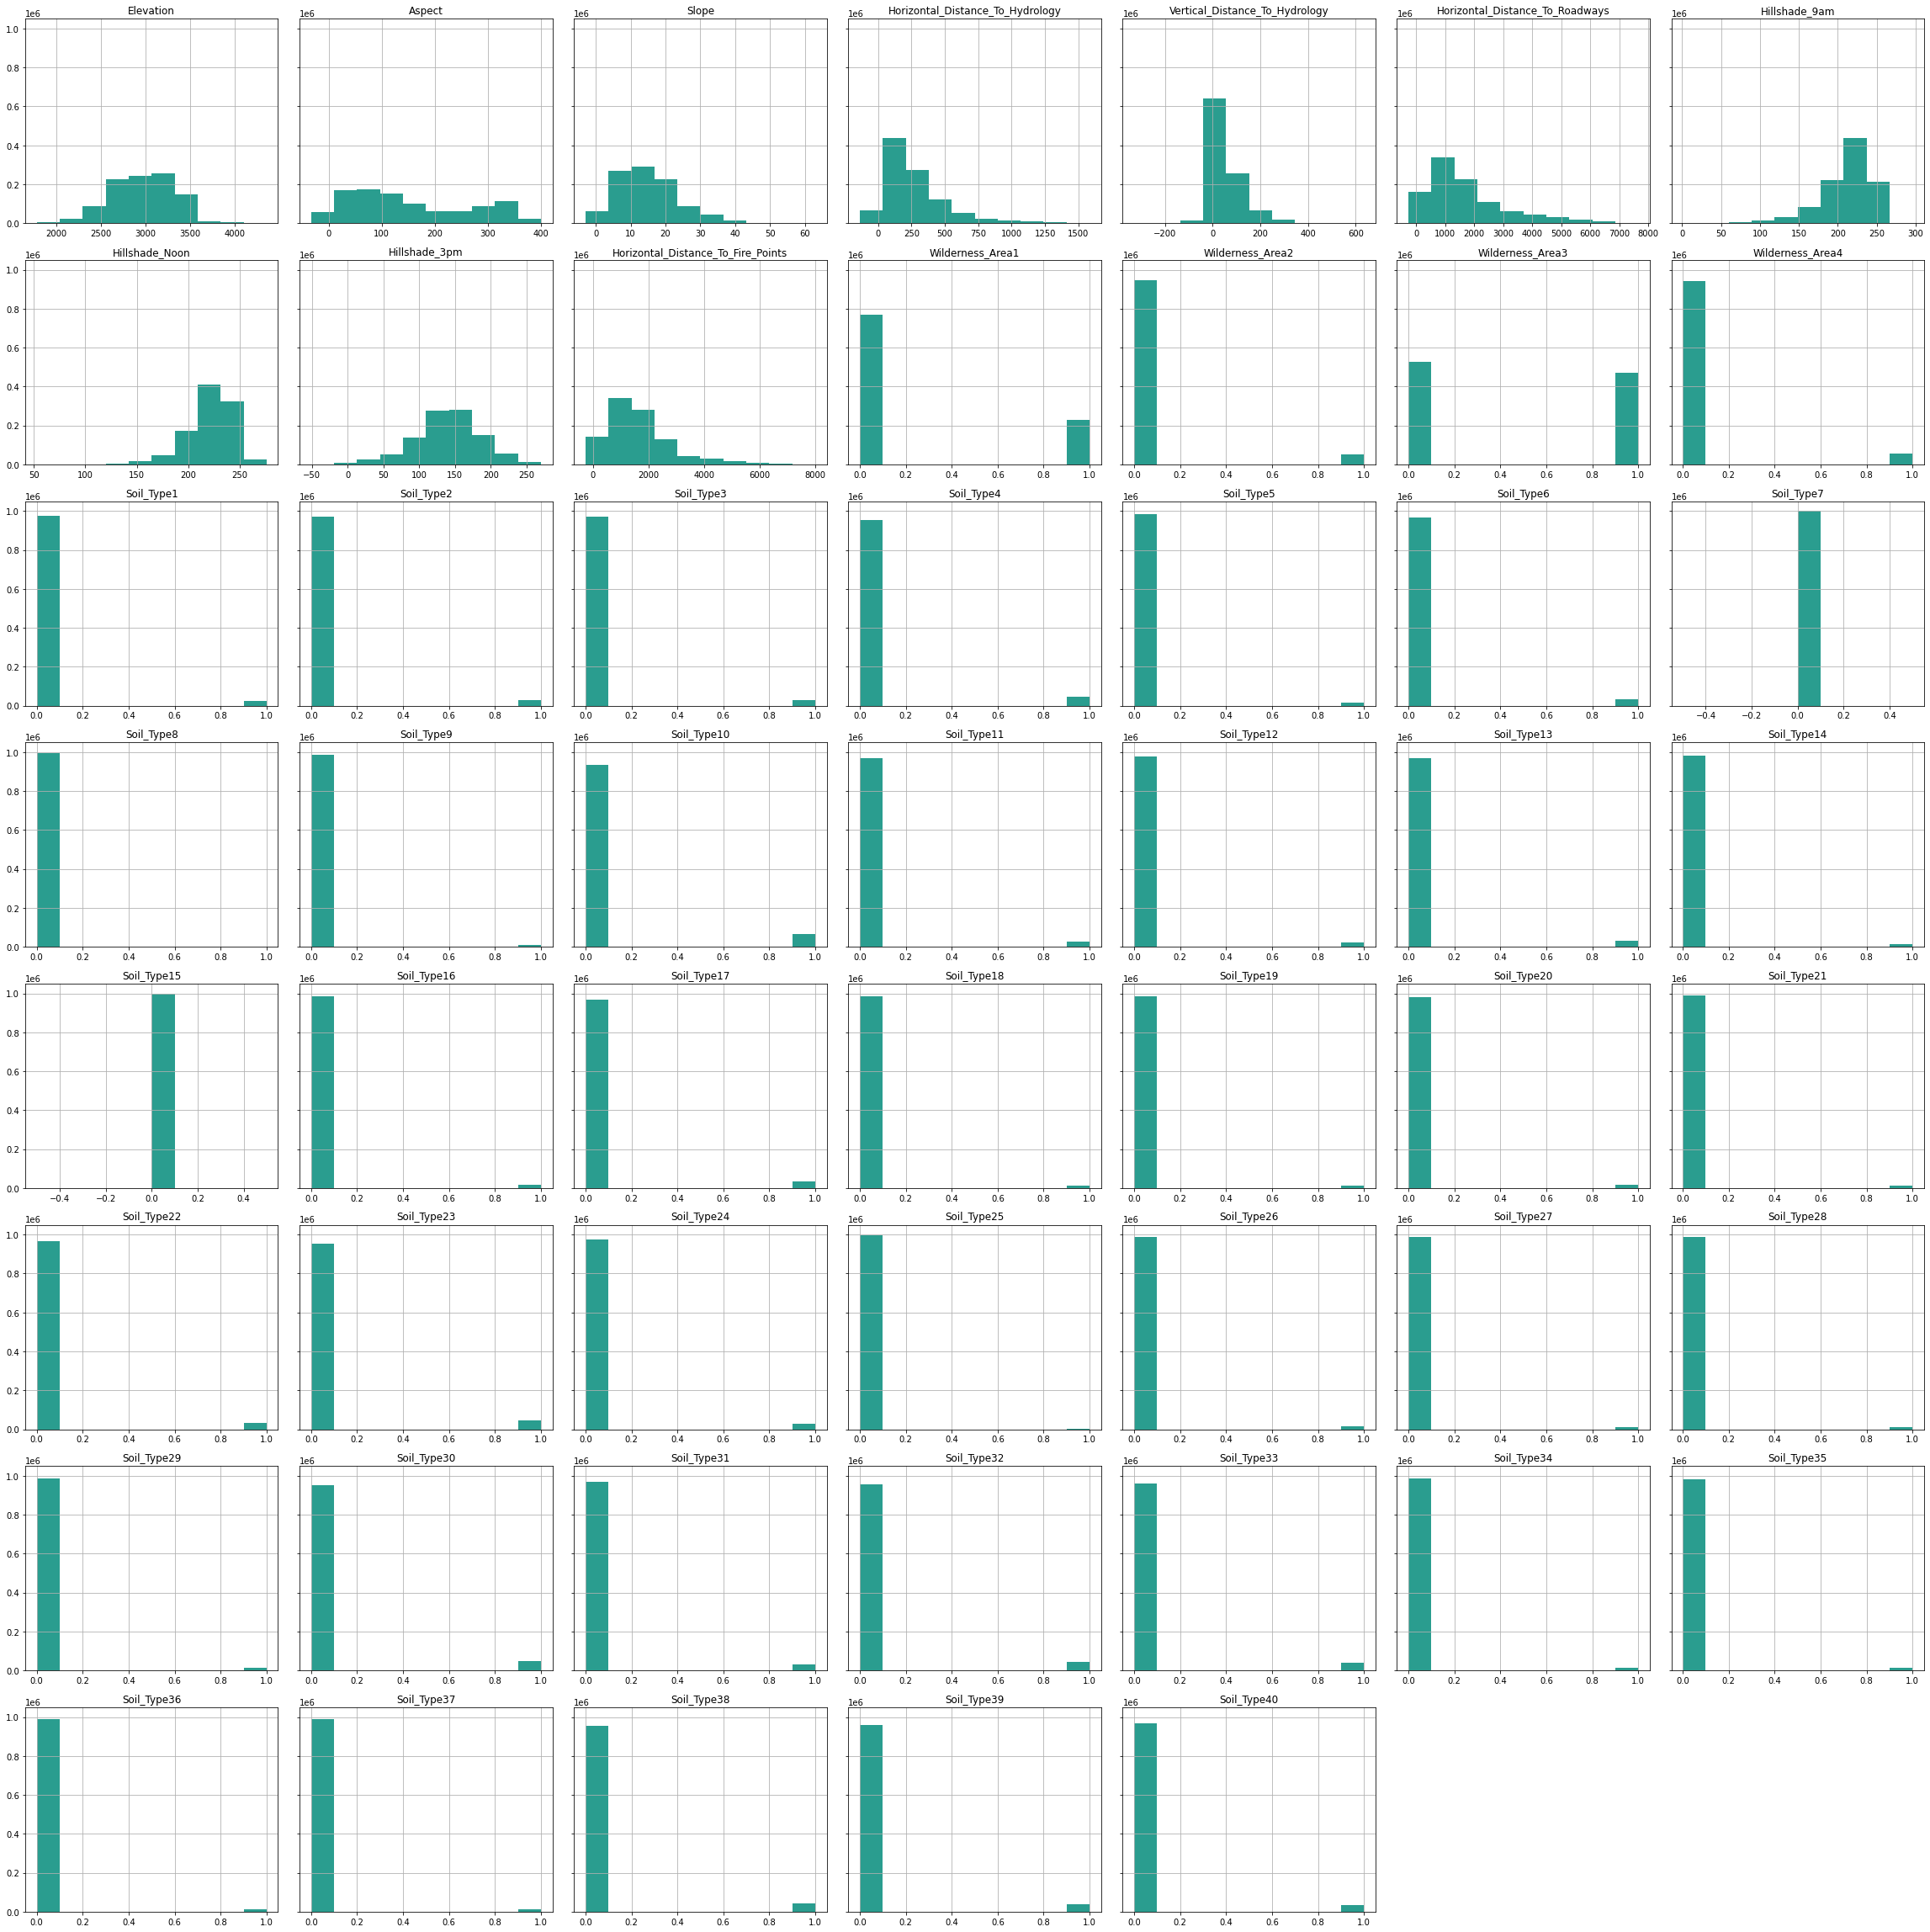

In [24]:
test_df[test_df.columns[1:]].hist(figsize=(32, 32), sharey=True);
plt.tight_layout()

# Summary 2

The test dataset has 54 features with a total of 1000000 samples. All features are of type int64. There are no missing values. Most of the features distribution looks bimodal or left/right-skewed.
